<a href="https://colab.research.google.com/github/abyansetya/Praktikum_ML/blob/main/Tugas2_Nama_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Abyan Setyaneva

NIM  : 24060122130058


Nama Dataset : Student Lifestyle


LINK : https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset

TUGAS 2 PRAKTIKUM ML

Pertemuan 2

In [2]:
# Import libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Import dataset
# Sesuaikan dengan lokasi file xclara.csv di local komputer
dataset = pd.read_csv('student_lifestyle.csv')
# Menggunakan dataset hanya dengan fitur Study_Hours_Per_Day dan Sleep_Hours_Per_Day
data = dataset[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']]

print(data.shape)
print(data.head(20))

(2000, 2)
    Study_Hours_Per_Day  Sleep_Hours_Per_Day
0                   6.9                  8.7
1                   5.3                  8.0
2                   5.1                  9.2
3                   6.5                  7.2
4                   8.1                  6.5
5                   6.0                  8.0
6                   8.0                  5.3
7                   8.4                  5.6
8                   5.2                  6.3
9                   7.7                  9.8
10                  9.7                  8.0
11                  6.9                  9.1
12                  6.4                  5.7
13                  5.0                  8.5
14                  8.9                  6.8
15                  6.7                  6.6
16                  8.6                  9.4
17                  8.8                  8.9
18                  7.6                  5.1
19                  6.6                  9.5


Kode mengimpor pustaka untuk analisis data (pandas, numpy), visualisasi (matplotlib), dan manipulasi objek (deepcopy). Dataset student_lifestyle.csv dimuat, lalu dua fitur, *Study_Hours_Per_Day* dan *Sleep_Hours_Per_Day*, dipilih untuk analisis, dengan tampilan ukuran dan contoh data awal.

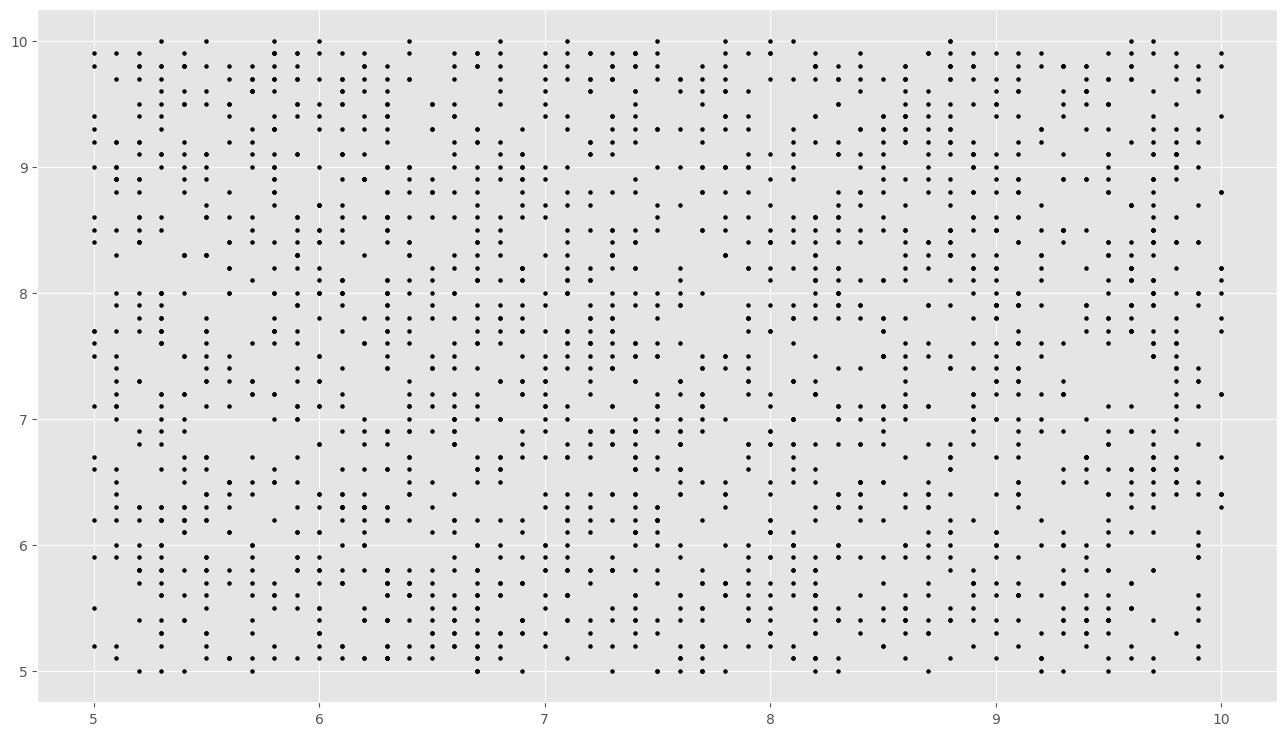

In [3]:
# Plot dataset
f1 = data['Study_Hours_Per_Day'].values
f2 = data['Sleep_Hours_Per_Day'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

Kode memplot data dari dua fitur, Study_Hours_Per_Day dan Sleep_Hours_Per_Day, dalam bentuk scatter plot. Fitur ini diekstraksi menjadi array dua dimensi menggunakan numpy, lalu data divisualisasikan sebagai titik hitam kecil menggunakan matplotlib.

In [4]:
# KMeans clustering
from sklearn.cluster import KMeans

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=4)

# Fitting input data
kmeans = kmeans.fit(X)

# Mendapatkan cluster labels
labels = kmeans.predict(X)

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_

# Mencetak nilai centroid
print(C)

[[6.28014981 8.7241573 ]
 [6.28370221 6.17706237]
 [8.85254582 8.74949084]
 [8.63682008 6.22970711]]


Kode melakukan clustering dengan KMeans untuk membagi data menjadi 4 cluster. Model dilatih menggunakan data, label cluster dihitung, dan koordinat centroid setiap cluster dicetak untuk analisis.

In [5]:
from sklearn.cluster import KMeans

for k in range(1, 10):
    # Menentukan jumlah cluster
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fitting input data
    kmeans = kmeans.fit(X)

    # Mendapatkan cluster labels
    labels = kmeans.predict(X)

    # Menghitung jumlah jarak antara setiap sampel dengan cluster centroid-nya (SSE)
    inertia = kmeans.inertia_

    print(f"k: {k}, cost: {inertia}")

print()


k: 1, cost: 8319.495594999986
k: 2, cost: 5103.613615009385
k: 3, cost: 3139.8919504772734
k: 4, cost: 2066.819911195466
k: 5, cost: 1767.903146997735
k: 6, cost: 1486.5460774634341
k: 7, cost: 1275.2381769045987
k: 8, cost: 1079.2139636526774
k: 9, cost: 931.9287757402012



Kode ini melakukan evaluasi untuk menentukan jumlah cluster optimal dengan KMeans. Model dilatih dengan jumlah cluster yang bervariasi dari 1 hingga 9. Setiap iterasi, model KMeans dibuat dan dilatih dengan data, label cluster dihasilkan, dan nilai *inertia* (SSE) dihitung. Nilai *inertia* mencerminkan total jarak antara setiap sampel dan centroid cluster-nya. Hasilnya, jumlah cluster dan nilai *inertia* dicetak untuk membantu menentukan jumlah cluster terbaik.

In [6]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.35951316649350007

Kode ini menghitung nilai silhouette score untuk mengevaluasi kualitas clustering. Silhouette score mengukur seberapa baik setiap data cocok dengan cluster-nya sendiri dibandingkan dengan cluster lain. Semakin mendekati 1 nilai ini, semakin baik clustering yang dihasilkan. Fungsi silhouette_score menerima data X dan label cluster yang dihasilkan sebelumnya sebagai input.